# Cracking an Old Cipher

Encrypt and decrypt something using the vigenere cipher and a key. Then, we try to crack the cypher and find the key.

In [112]:
import math as mt
import numpy as np
import matplotlib
import ipywidgets as widg
matplotlib.rcParams['figure.figsize'] = [12, 8]
from matplotlib import pyplot as plt

# Helper functions
to_ints = lambda text: np.array(list(text), dtype='<U1').view('<u4')
to_chrs = lambda ints: ''.join(ints.view('<U1'))

def extend_to_fit(key, text):
    """
    Extend key by repitition to
    match length of key to length
    of text
    
    :param key: key to extend
    :param text: text to fit to
    
    :return: extended key
    """
    keys = key * ( mt.ceil(len(plaintext)/len(key)) )
    return keys[:len(plaintext)]

Our plaintext and key

In [113]:
plaintext = """Did you ever hear the tragedy of Darth Plagueis The Wise? 
I thought not. It's not a story the Jedi would tell you. It's a Sith 
legend. Darth Plagueis was a Dark Lord of the Sith, so powerful and 
so wise he could use the Force to influence the midichlorians to create 
life. He had such a knowledge of the dark side that he could even keep 
the ones he cared about from dying. The dark side of the Force is a 
pathway to many abilities some consider to be unnatural. He became so 
powerful. the only thing he was afraid of was losing his power, which 
eventually, of course, he did. Unfortunately, he taught his apprentice 
everything he knew, then his apprentice killed him in his sleep. Ironic. 
He could save others from death, but not himself."""

key = 'notfromajedi'

Encrypt it using vigenere cipher

In [114]:
# Convert plaintext and key to integers
# Extend key to fit plaintext
plaintext_i = to_ints(plaintext)
keys_i      = to_ints(extend_to_fit(key, plaintext))

# Encrypt plaintext using key into cyphertext
ciphertext = to_chrs(plaintext_i + keys_i)

# Print cyphertext
print('Ciphertext:')
print()
print(ciphertext)

Ciphertext:

²ØØëÞâÏÛÉÛ×ÙÇäáÉÏØÛÏÖÙÊëÜÇ©ÅÛâ×¶ÞÐÔÖÏÎ×Â×ÙÉØàÆ©n²ãÜÕçÖÕÕÓÓÝ½ÚâÏÙÙÊâèÕäèÕÒÊ³ÓÓÝéÞâÍÎØÎÚÛßáä³ÙÜÐ¹ÛãÕtÑÉÐÓÝØ³ÎÓÞÍ¹ÚÐÛÛ×ØàáÆ×Ï¸ÇäÚ­Ù×ÈÝÕÚÚÔ´ÓÙÌâãâÞäÆÜËÙÕÐâÊyàÐÜÍÜÓÜËÒÜÖÖÉÞáÔÚÚÔ§Ù×ÇÎããÛÝÓÍßÊÒÌÓèÎ×ÚÊÎÎÇÑÚÞæÏÓÝàÞÔÌàÔÕÚ×wÍÓËÉ·ÙÚÐÑÝÚÇÑÐÑàÞäÍÏÉËÎÞÚæ×ÒÎÆÖÔâÝÊ×áÉËÙÑÓ×ÕçÛÑÏÛÉ×ÚÙËâwÕÒÊØÜÔçÚÔÄË×ÉÍÐÖÕçãÇÜÔÑÒèÝÔÙµÒÊÍÏáßåØÑÆÔÊâ×Ù¸ÞßÄÏÍÜÐpâÐáÉáÆÝâÞÓÓÝæËÇÍÕ×ãÝËåàÐ×ÊÌÝÝçÏÖÔßÞÔËÓéÔàÐáÖÜÆÐ·ÙÔÔÐÂ×ÊÜÝ~ÖáæÒÓÐÚÐãÜËÞÛÍãØÑ×ÝÛÚÔØËØÊÔáÕÏÖÜÇÜÅÜÛãÙÛÝÔÒÎ×ÞÞëËäØÒÎÇÑyÙÜ×ÝáÖËÑÐâãÌÒÜÖÜØÉ×ÙÖØÑºÒÏÝáèÛàÐáÆÖÞÖÔÚÓäÔÉÞÌÒáÕÖâáÒÏÞÎÇÎyÙÜ×áæÕÒÎÒÐ×ÙÝÝÒØØÑÓÝÎÛâÂÚÕÖÎÜãÝÉ×ØÊÖÑÉÍ×ÝÓØÛÒÎ×áÛÙËâªÜÔÒÒÑpºÔÄÙÚÐÍâÕÜ×ÜÕÒÊÖÜÕæÕßÑÆËÙÌÑéÚÝÜÕÍÍÖáÔàÌ 


Now let's try decrypting the text using our key. This is the reverse of the encryption process

In [115]:
# Convert ciphertext and key to integers
# Extend key to fit ciphertext
ciphertext_i = to_ints(ciphertext)
keys_i       = to_ints(extend_to_fit(key, ciphertext))

# Decrypt ciphertext using key into plaintext
plaintext = to_chrs(ciphertext_i - keys_i)

# Print plaintext
print(plaintext)

Did you ever hear the tragedy of Darth Plagueis The Wise? 
I thought not. It's not a story the Jedi would tell you. It's a Sith 
legend. Darth Plagueis was a Dark Lord of the Sith, so powerful and 
so wise he could use the Force to influence the midichlorians to create 
life. He had such a knowledge of the dark side that he could even keep 
the ones he cared about from dying. The dark side of the Force is a 
pathway to many abilities some consider to be unnatural. He became so 
powerful. the only thing he was afraid of was losing his power, which 
eventually, of course, he did. Unfortunately, he taught his apprentice 
everything he knew, then his apprentice killed him in his sleep. Ironic. 
He could save others from death, but not himself.


If we don't have the key, we theoretically cannot decypher the cyphertext... or can we?

The only difficult part is to find the length of the cipher

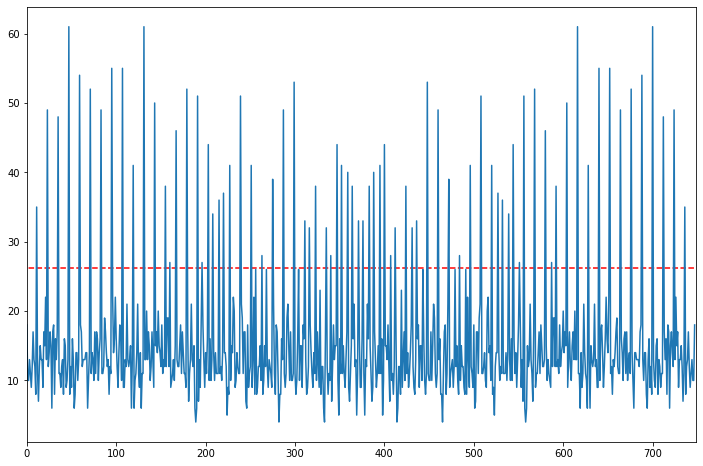

In [122]:
# Convert cyphertext to integers
ciphertext_i = to_ints(ciphertext)

# Create shift array
shifted = np.zeros((len(ciphertext), len(ciphertext)), dtype='i')
for i in range(len(ciphertext)):
    shifted[i,:] = np.roll(ciphertext_i, i)
    
# Match each row with original ciphertext and check for coincidences
ciphertext_i2 = np.expand_dims(ciphertext_i, axis=0)
coincidences = np.count_nonzero(shifted == ciphertext_i2, axis=1)[1:]
heights, bins = np.histogram(coincidences, bins=20);

# Noise ceiling
noise_ceil = np.mean(coincidences) + np.std(coincidences)

# Plot data
fig = plt.figure();
ax = plt.axes();
ax.set_xlim( 0, len(ciphertext) )
ax.plot(coincidences);
ax.hlines([noise_ceil], *ax1.get_xlim(), colors='red', linestyle='dashed' )
plt.show();